<a href="https://colab.research.google.com/github/QuantumTCode/FIRST-AI-Crash-Course/blob/master/Lesson%20%231%3A%20Deep%20Neural%20Networks/Master_of_AI_Crash_Course_1_Regression_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIRST Houston AI Crash Course: Deep Neural Networks

## Step 1: Import Necessary Libraries




In [0]:
#Seaborn is a pretty cool data visualization library
!pip install -q seaborn

In [0]:
#Pandas is a data processing library
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#and TensorFlow is the backbone of Keras, which is the Neural Network Library we will be using
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Splitting Data
from sklearn.model_selection import train_test_split

import pathlib

## Step 2: Let's Get the Data In 


In [0]:
!wget https://raw.githubusercontent.com/QuantumTCode/FIRST-AI-Crash-Course/master/Lesson%20%231%3A%20Deep%20Neural%20Networks/mpg_test_X.csv
!wget https://raw.githubusercontent.com/QuantumTCode/FIRST-AI-Crash-Course/master/Lesson%20%231%3A%20Deep%20Neural%20Networks/mpg_train_dataset.csv

In [0]:
train_dataset=pd.read_csv('mpg_train_dataset.csv')
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,34.1,4,91.0,68.0,1985.0,16.0,81,0.0,0.0,1.0
1,20.2,6,200.0,85.0,2965.0,15.8,78,1.0,0.0,0.0
2,32.2,4,108.0,75.0,2265.0,15.2,80,0.0,0.0,1.0
3,19.4,6,232.0,90.0,3210.0,17.2,78,1.0,0.0,0.0
4,30.0,4,135.0,84.0,2385.0,12.9,81,1.0,0.0,0.0


In [0]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 10 columns):
MPG             314 non-null float64
Cylinders       314 non-null int64
Displacement    314 non-null float64
Horsepower      314 non-null float64
Weight          314 non-null float64
Acceleration    314 non-null float64
Model Year      314 non-null int64
USA             314 non-null float64
Europe          314 non-null float64
Japan           314 non-null float64
dtypes: float64(8), int64(2)
memory usage: 24.6 KB


In [0]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.283439,5.525478,197.076433,105.050955,2999.550955,15.479936,75.993631,0.627389,0.181529,0.191083
std,7.834199,1.712850,103.549623,38.093931,842.803180,2.788465,3.657015,0.484272,0.386071,0.393782
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,107.000000,75.250000,2257.250000,13.500000,73.000000,0.000000,0.000000,0.000000
50%,22.150000,4.000000,151.000000,95.000000,2845.000000,15.450000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [0]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()

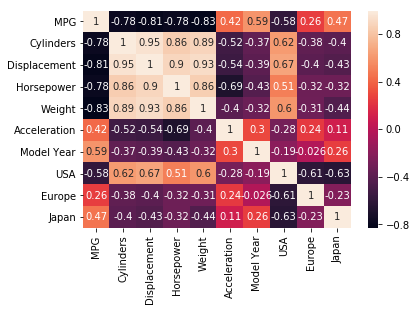

In [0]:
sns.heatmap(train_dataset.corr(),annot=True)

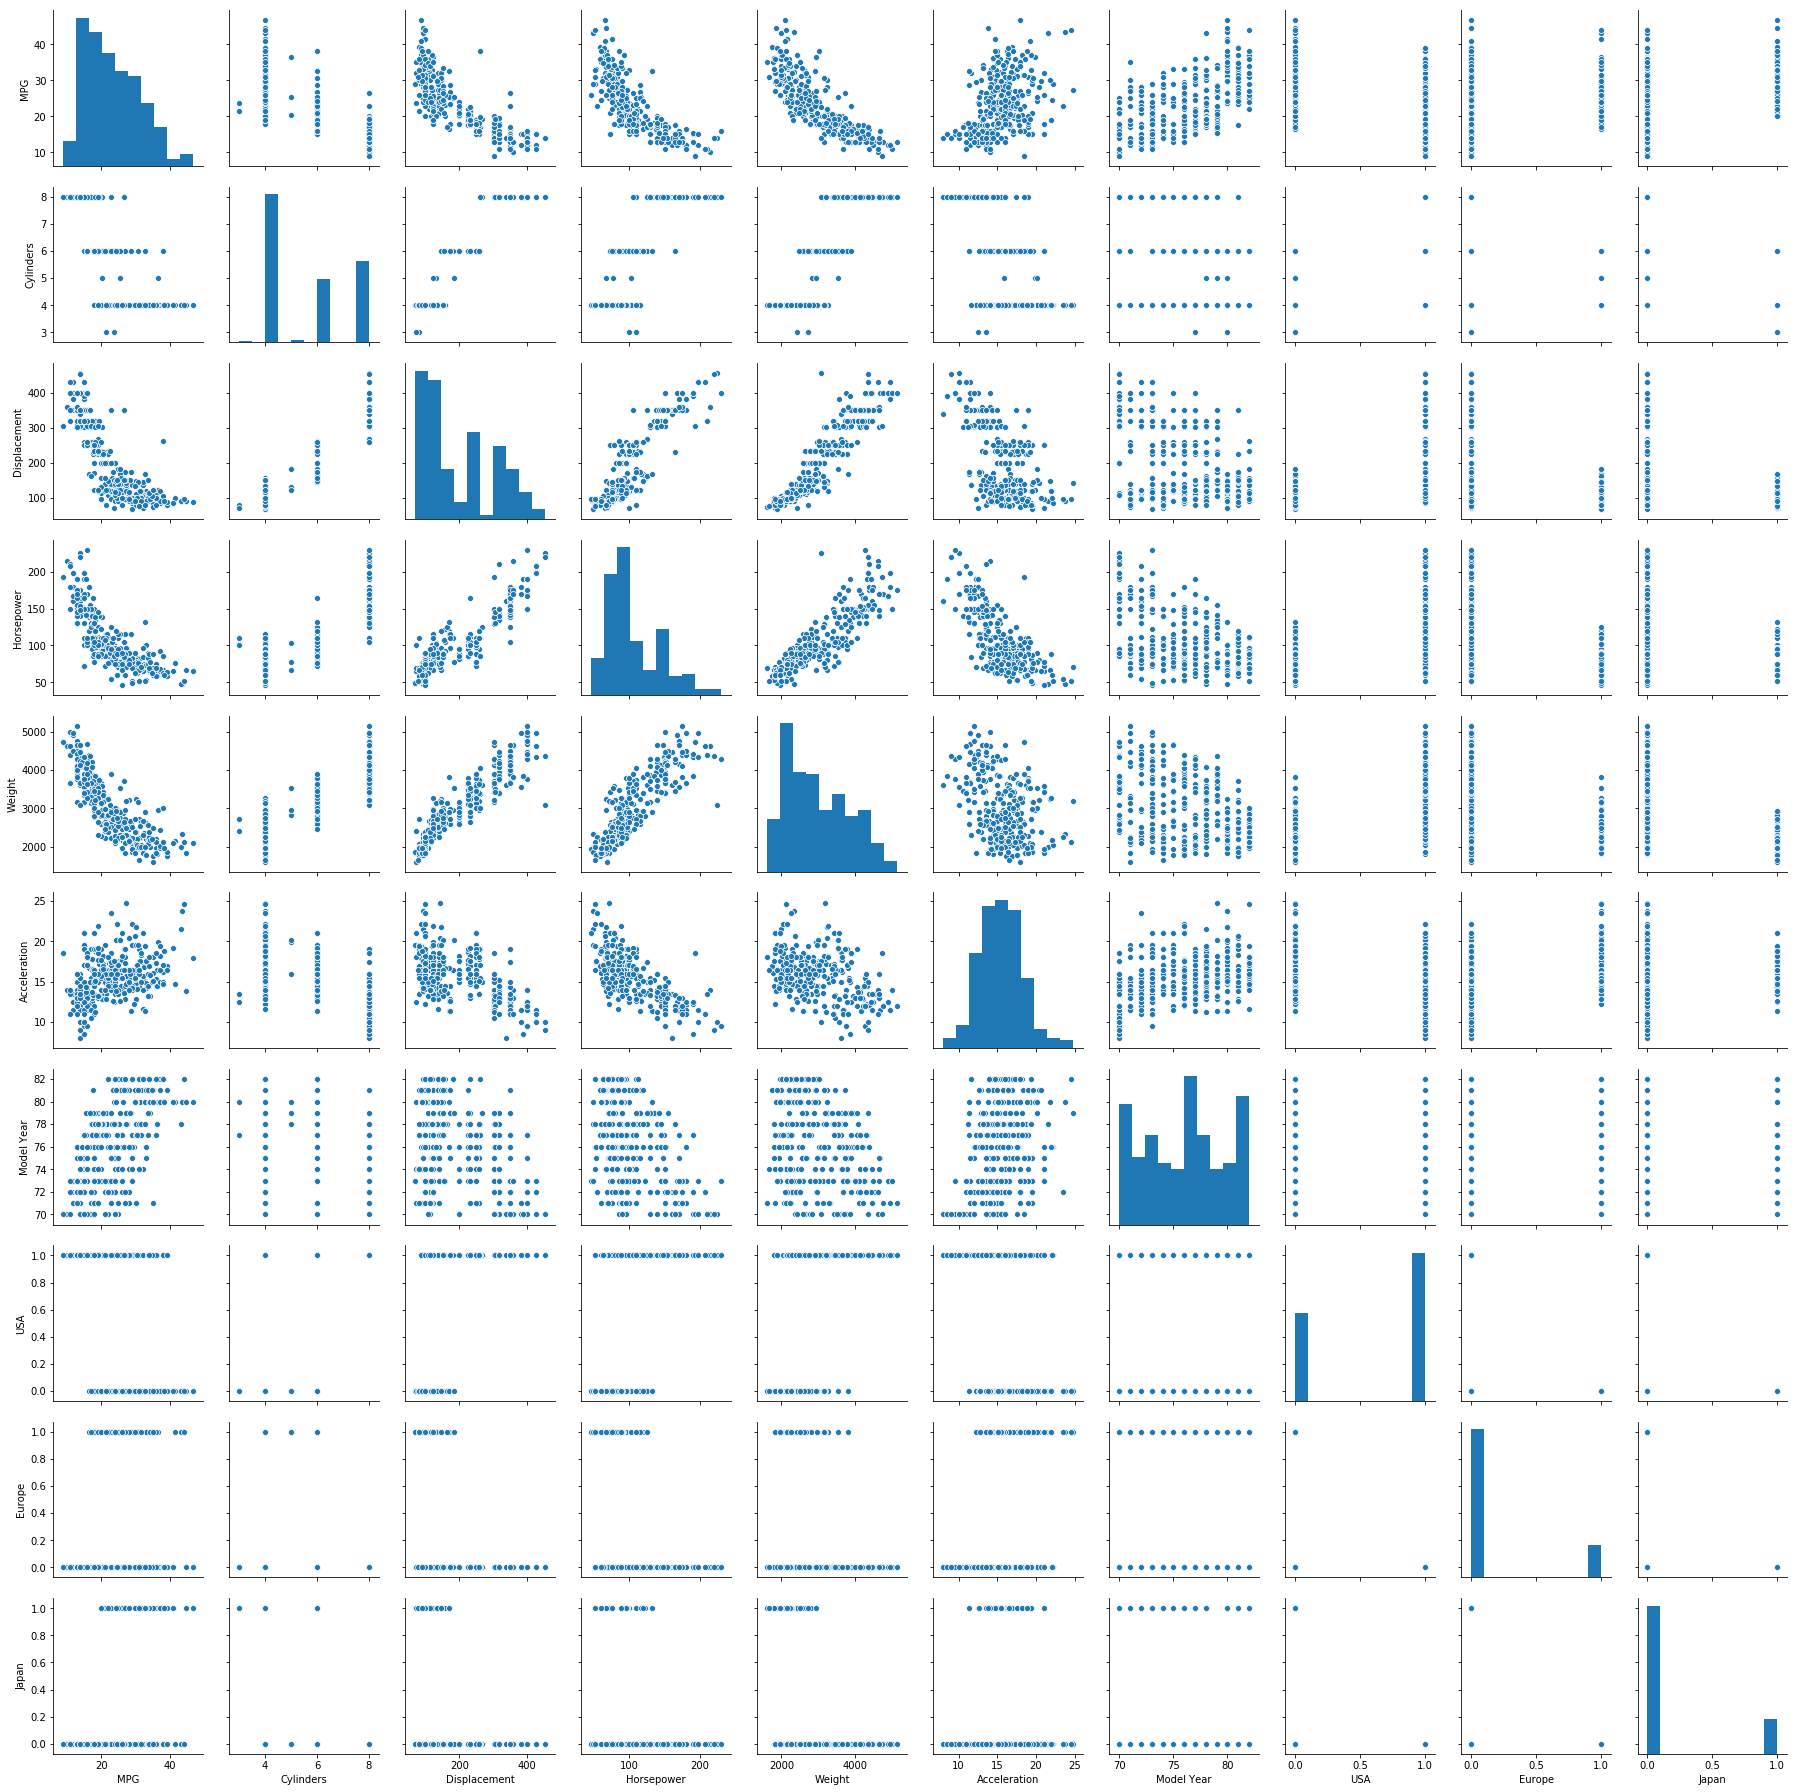

In [0]:
sns.pairplot(train_dataset)

In [0]:
Y = train_dataset["MPG"]
X = train_dataset.drop('MPG', axis=1)

In [0]:
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
#simple normalization function
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [0]:
normed_train_X = norm(train_X)
normed_val_X = norm(val_X)

In [0]:
print(len(normed_train_X.keys()))

9


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1, activation=tf.nn.sigmoid, input_shape=[9]),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.SGD(1)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 10        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 2         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = normed_train_X[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.01287294],
       [-0.4023777 ],
       [-0.4756643 ],
       [-0.72328484],
       [-1.0393763 ],
       [-0.85585266],
       [-0.66991633],
       [-0.7363708 ],
       [-0.25165418],
       [-0.11721808]], dtype=float32)

In [0]:
#Keras callback, prints a dot for every epoch, just easier to keep track of training
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
EPOCHS = 1

history = model.fit(
  normed_train_X, train_Y,
  epochs=EPOCHS, verbose=0,
  validation_data = [normed_val_X, val_Y],
  callbacks=[PrintDot()])


.

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,8684.532254,75.140778,8684.532227,38044.769965,189.809555,38044.769531,0


In [0]:
#Plot history of model function

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,10])
  plt.legend()
  plt.show()


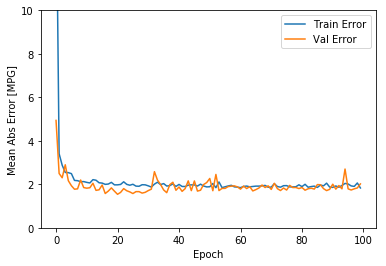

In [0]:
plot_history(history)


................................................................................................

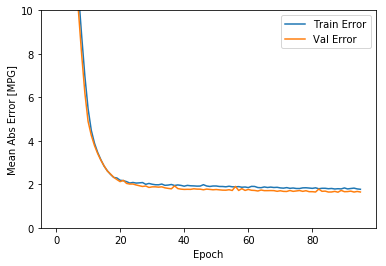

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_X, train_Y, epochs=EPOCHS,
                    validation_data = [normed_val_X, val_Y], verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_val_X, val_Y, verbose=0)

print("Validation Mean Abs Error: {:5.2f} MPG".format(mae))

Validation Mean Abs Error: 189.81 MPG


In [0]:
test_X = pd.read_csv("mpg_test_X.csv")

In [0]:
normed_test_X = norm(test_X)

In [0]:
test_predictions = model.predict(normed_test_X)

In [0]:
test_predictions

array([[-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-144.87544],
       [-229.97345],
       [-144.87544],
       [-144.87549],
       [-144.87544],
       [-144.87544],
       [-145.03114],
       [-243.26895],
       [-243.26895],
       [-144.

In [0]:
submission = pd.DataFrame(data=test_predictions, columns=["MPG"])

In [0]:
submission.to_csv("submission.csv",index_label="index")